In [12]:
from samap.analysis import FunctionalEnrichment
from samap.mapping import SAMAP
from samap.analysis import get_mapping_scores, GenePairFinder, sankey_plot
from samalg import SAM
from samap.utils import save_samap, load_samap

In [110]:
# load eggnog tables
import pandas as pd
emap1 = pd.read_csv('/home/OiPui/share/OiPui/Ciona_data/SAMap/eggnog/Mm.emapper.annotations', 
                    header=4, 
                    skipfooter=3, 
                    sep='\t',
                    index_col = 0)

emap2 = pd.read_csv('/home/OiPui/share/OiPui/Ciona_data/SAMap/eggnog/Ci.emapper.annotations', 
                    header=4, 
                    skipfooter=3, 
                    sep='\t',
                    index_col=0)

/home/OiPui/anaconda3/envs/SAMap/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys
/home/OiPui/anaconda3/envs/SAMap/lib/python3.7/site-packages/ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  del sys.path[0]


In [14]:
# load SAMAP
sm = load_samap('/home/OiPui/share/OiPui/Ciona_data/SAMap/data/mouse_ciona_eggnog.pkl')

In [102]:
emap2.reset_index(inplace = True)
emap2['#query'] = emap2['#query'].str.replace('KH', 'KH2012:KH')
emap2 = emap2.set_index('#query')

In [103]:
emap2

,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs
#query,,,,,,,,,,,,,,,,,,,,
KH2012:KH.C1.1.v1.A.ND1-1,7719.XP_002126265.1,2.860000e-176,489.0,"2AT57@1|root,2RZRC@2759|Eukaryota,39YMH@33154|...",33208|Metazoa,S,protein C1orf158 homolog,C1orf158,-,-,-,-,-,-,-,-,-,-,-,-
KH2012:KH.C1.1.v1.A.SL2-1,7719.XP_002126265.1,2.860000e-176,489.0,"2AT57@1|root,2RZRC@2759|Eukaryota,39YMH@33154|...",33208|Metazoa,S,protein C1orf158 homolog,C1orf158,-,-,-,-,-,-,-,-,-,-,-,-
KH2012:KH.C1.1.v1.A.SL3-1,7719.XP_002126265.1,2.860000e-176,489.0,"2AT57@1|root,2RZRC@2759|Eukaryota,39YMH@33154|...",33208|Metazoa,S,protein C1orf158 homolog,C1orf158,-,-,-,-,-,-,-,-,-,-,-,-
KH2012:KH.C1.10.v1.A.SL3-1,7719.XP_009862105.1,6.130000e-166,464.0,"KOG1702@1|root,KOG1702@2759|Eukaryota,39RV7@33...",33208|Metazoa,T,actin binding,LASP1,"GO:0003674,GO:0003779,GO:0005070,GO:0005215,GO...",-,-,-,-,-,-,-,-,-,-,"LIM,Nebulin,SH3_1,SH3_9"
KH2012:KH.C1.10.v2.A.SL2-1,7719.XP_009862105.1,6.130000e-166,464.0,"KOG1702@1|root,KOG1702@2759|Eukaryota,39RV7@33...",33208|Metazoa,T,actin binding,LASP1,"GO:0003674,GO:0003779,GO:0005070,GO:0005215,GO...",-,-,-,-,-,-,-,-,-,-,"LIM,Nebulin,SH3_1,SH3_9"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KH2012:KH.S999.1.v1.A.SL2-1,7719.XP_002127746.1,4.220000e-286,781.0,"COG0457@1|root,KOG0551@2759|Eukaryota,39SCA@33...",33208|Metazoa,O,Tetratricopeptide repeats,TTC4,"GO:0005575,GO:0005622,GO:0005623,GO:0005634,GO...",-,-,-,-,-,-,-,-,-,-,"TPR_1,TPR_16,TPR_19,TPR_8"
KH2012:KH.S999.1.v1.A.SL3-1,7719.XP_002127746.1,4.220000e-286,781.0,"COG0457@1|root,KOG0551@2759|Eukaryota,39SCA@33...",33208|Metazoa,O,Tetratricopeptide repeats,TTC4,"GO:0005575,GO:0005622,GO:0005623,GO:0005634,GO...",-,-,-,-,-,-,-,-,-,-,"TPR_1,TPR_16,TPR_19,TPR_8"
KH2012:KH.S999.2.v1.A.SL1-1,7719.XP_002127882.1,6.950000e-225,621.0,"COG5220@1|root,KOG3800@2759|Eukaryota,38CBI@33...",33208|Metazoa,O,CDK-activating kinase assembly factor,MNAT1,"GO:0000079,GO:0000082,GO:0000278,GO:0000428,GO...",-,ko:K10842,"ko03022,ko03420,map03022,map03420",M00290,-,-,"ko00000,ko00001,ko00002,ko03021,ko03400",-,-,-,"HTH_23,MAT1,zf-C3HC4_5"


In [113]:
k1 = 'TaxonomyRank4'
k2= 'Tissue_type'

(<Figure size 952.258x720 with 2 Axes>,
                                                 Ci_AMD+ motor ganglion  \
 Mm_Astrocytes                                             8.586042e-08   
 Mm_Cerebellum neurons                                     2.087969e-06   
 Mm_Cholinergic and monoaminergic neurons                  6.602025e-04   
 Mm_Choroid epithelial cells                               0.000000e+00   
 Mm_Dentate gyrus granule neurons                          1.891207e-05   
 Mm_Dentate gyrus radial glia-like cells                   0.000000e+00   
 Mm_Di- and mesencephalon excitatory neurons               5.841153e-04   
 Mm_Di- and mesencephalon inhibitory neurons               4.559072e-06   
 Mm_Enteric glia                                           0.000000e+00   
 Mm_Enteric neurons                                        0.000000e+00   
 Mm_Ependymal cells                                        0.000000e+00   
 Mm_Glutamatergic neuroblasts                              2

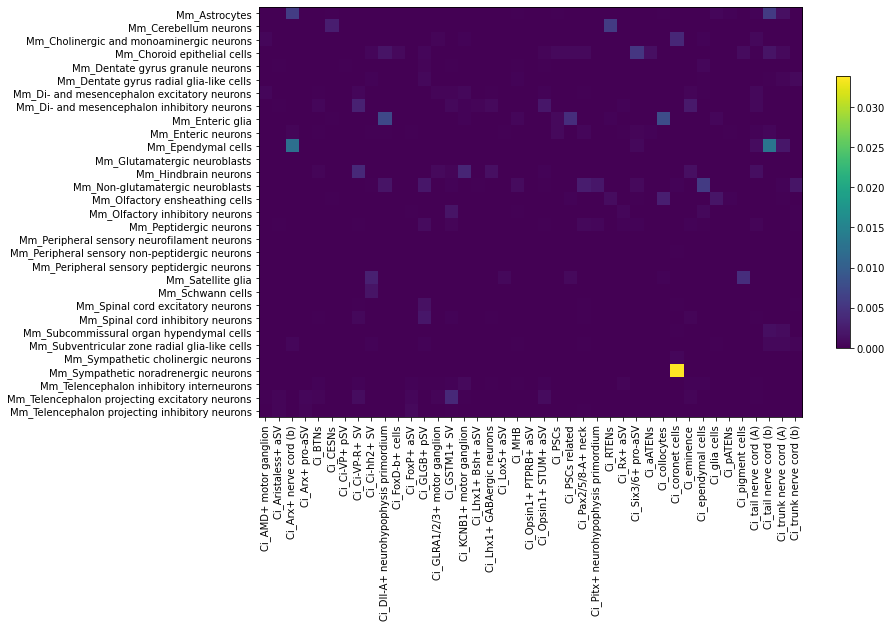

In [31]:
sm.display_heatmap(key1=k1,key2=k2)

In [116]:
# do functional enrichment
fe = FunctionalEnrichment(sm, [emap1, emap2], col_key='GOs', keys=[k1, k2], delimiter=',')

Finding enriched gene pairs between Mm and Ci...


KeyError: 'Ci'

In [114]:
gpf = GenePairFinder(sm, k1,k2)

/home/OiPui/anaconda3/envs/SAMap/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Finding cluster-specific markers in Mm:TaxonomyRank4 and Ci:Tissue_type.


... storing 'TaxonomyRank4' as categorical
/home/OiPui/anaconda3/envs/SAMap/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/OiPui/anaconda3/envs/SAMap/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
... storing 'Tissue_type' as categorical


In [109]:
k1 = 'Mm'
k2 = 'Ci'

In [ ]:
enrichment_scores,num_enriched_genes,enriched_genes = fe.calculate_enrichment(verbose=True)